In [20]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

def one_hot(labels):
    one_hot = np.zeros((labels.size, 10))
    one_hot[np.arange(labels.size), labels] = 1
    return one_hot.T

def get_accuracy(results, labels):
    return (np.sum(np.argmax(results, 0) == labels) / labels.size)

def show_mistakes(results, labels, data, samples = 10):
    results = np.argmax(results, 0)
    j = 0
    for i in range(labels.size):
        if results[i] != labels[i]:
            print("labeled: ", labels[i], ", classified: ", results[i])
            plt.imshow(data[:,i].reshape((28, 28)), cmap='gray')
            plt.show()
            j += 1
            if j == samples:
                return


### Non linear functions

In [2]:
def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

### Forward and backward propagation

In [3]:
def forward_prop(W1, W2, B1, B2, training_data):
    Z1 = W1.dot(training_data) + B1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)
    return Z1, Z2, A1, A2

def back_prop(Z1, A1, A2, W2, training_data, labels, rows):
    dZ2 = A2 - labels
    dW2 = (1 / rows) * dZ2.dot(A1.T)
    dB2 = (1 / rows) * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
    dW1 = (1 / rows) * dZ1.dot(training_data.T)
    dB1 = (1 / rows) * np.sum(dZ1)
    return dW1, dW2, dB1, dB2

### Adjusting weights and biases after a training cycle

In [4]:
def weights_adjust(W1, W2, dW1, dW2, learning_rate):
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    return W1, W2

def biases_adjust(B1, B2, dB1, dB2, learning_rate):
    B1 = B1 - learning_rate * dB1
    B2 = B2 - learning_rate * dB2
    return B1, B2

### Initialization of weights and biases

In [5]:
def weights_init():
    W1 = np.random.rand(56, 784) - 0.5
    W2 = np.random.rand(10, 56) - 0.5
    return W1, W2

def biases_init():
    B1 = np.random.rand(56, 1) - 0.5
    B2 = np.random.rand(10, 1) - 0.5
    return B1, B2

### Gradient descend

In [6]:
def gradient_descend(training_data, labels, iterations, learning_rate):
    W1, W2 = weights_init()
    B1, B2 = biases_init()
    one_hot_labels = one_hot(labels)

    for i in range(iterations):
        Z1, Z2, A1, A2 = forward_prop(W1, W2, B1, B2, training_data)
        dW1, dW2, dB1, dB2 = back_prop(Z1, A1, A2, W2, training_data, one_hot_labels, labels.size)
        W1, W2 = weights_adjust(W1, W2, dW1, dW2, learning_rate)
        B1, B2 = biases_adjust(B1, B2, dB1, dB2, learning_rate)

    return W1, W2, B1, B2

### Training

In [11]:
training_data = idx2numpy.convert_from_file("mnist/train-images.idx3-ubyte")
training_labels = idx2numpy.convert_from_file("mnist/train-labels.idx1-ubyte")
#plt.imshow(data[2,:,:], cmap='gray')
#plt.show()
rows, _, _ = training_data.shape
training_data = np.reshape(training_data, (rows, -1)).T / 255

W1, W2, B1, B2 = gradient_descend(training_data, training_labels, 500, 0.1)

np.save("W1_56_10.npy", W1)
np.save("W2_56_10.npy", W2)
np.save("B1_56_10.npy", B1)
np.save("B2_56_10.npy", B2)

### Results

Accuracy on training set:  0.8828166666666667
Accuracy on test set:  0.881
labeled:  5 , classified:  6


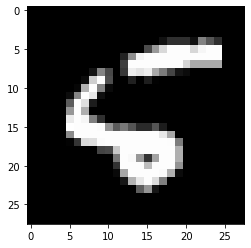

labeled:  4 , classified:  6


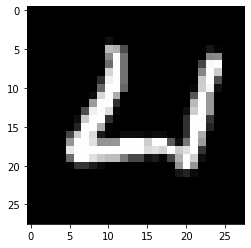

labeled:  6 , classified:  2


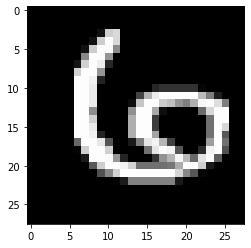

labeled:  3 , classified:  2


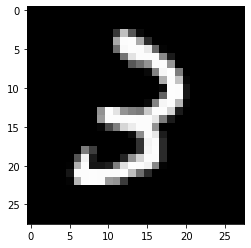

labeled:  6 , classified:  2


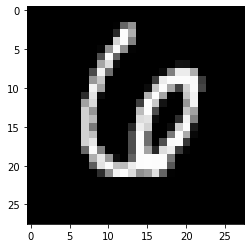

labeled:  2 , classified:  7


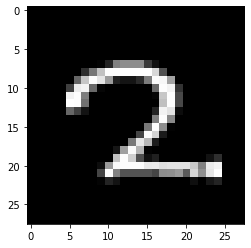

labeled:  3 , classified:  5


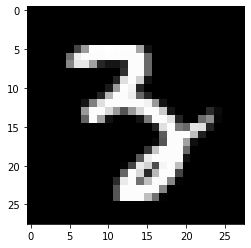

labeled:  9 , classified:  8


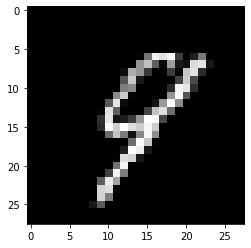

labeled:  5 , classified:  8


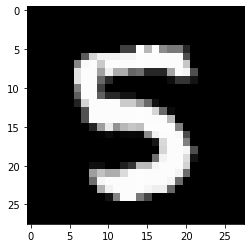

labeled:  4 , classified:  9


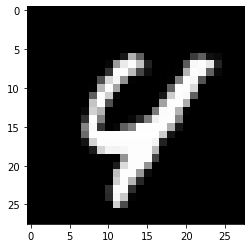

labeled:  2 , classified:  4


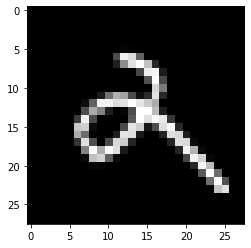

labeled:  2 , classified:  3


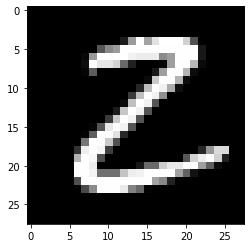

labeled:  9 , classified:  4


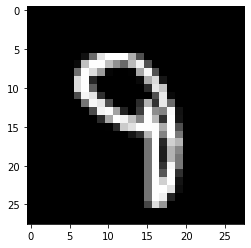

labeled:  6 , classified:  5


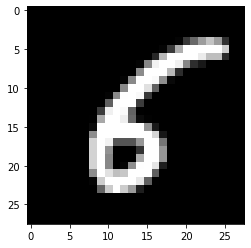

labeled:  8 , classified:  7


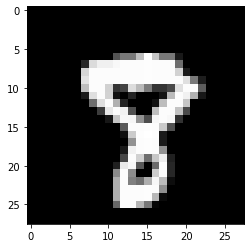

labeled:  9 , classified:  7


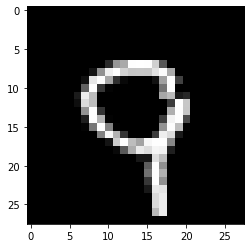

labeled:  9 , classified:  5


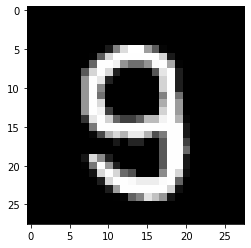

labeled:  3 , classified:  6


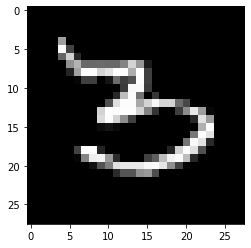

labeled:  4 , classified:  2


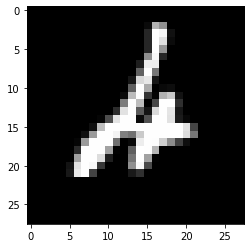

labeled:  9 , classified:  4


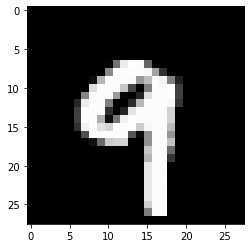

In [22]:
W1 = np.load("W1_56_10.npy")
W2 = np.load("W2_56_10.npy")
B1 = np.load("B1_56_10.npy")
B2 = np.load("B2_56_10.npy")

training_data = idx2numpy.convert_from_file("mnist/train-images.idx3-ubyte")
training_labels = idx2numpy.convert_from_file("mnist/train-labels.idx1-ubyte")
rows, _, _ = training_data.shape
training_data = np.reshape(training_data, (rows, -1)).T / 255

Z1, Z2, A1, A2 = forward_prop(W1, W2, B1, B2, training_data)
print("Accuracy on training set: ", get_accuracy(A2, training_labels))


test_data = idx2numpy.convert_from_file("mnist/t10k-images.idx3-ubyte")
test_labels = idx2numpy.convert_from_file("mnist/t10k-labels.idx1-ubyte")
rows, _, _ = test_data.shape
test_data = np.reshape(test_data, (rows, -1)).T / 255

Z1, Z2, A1, A2 = forward_prop(W1, W2, B1, B2, test_data)
print("Accuracy on test set: ", get_accuracy(A2, test_labels))

show_mistakes(A2, test_labels, test_data, 20)